In [3]:
%matplotlib inline
%run analyze_traj.py



 WELCOME TO TRACK_ANALYSIS 
 Developped and maintained by Arthur Michaut: arthur.michaut@gmail.com 
 Released on 03-29-2017


     _''_
    / o  \
  <       |
    \    /__
    /       \-----
    /    \    \   \__
    |     \_____\  __>
     \--       ___/  
        \     /
         || ||
         /\ /\


Usage: 
- plot cells analysis using cell_analysis(data_dir,refresh,parallelize,plot_traj,hide_labels,no_bkg,linewidth) 	 data_dir: data directory, refresh (default False) to refresh the table values, parallelize (default False) to run analyses in parallel, 
plot_traj (default true) to print the cell trajectories, hide_labels (default True) to hide the cell label, no_bkg (default False) to remove the image background, linewidth being the trajectories width (default=1.0) 

- plot maps using map_analysis(data_dir,refresh,parallelize,x_grid_size,no_bkg,z0,dimensions,axis_on) 	 data_dir: data directory, refresh (default False) to refresh the table values, parallelize (default False) to ru

In [ ]:
data_dir='/home/amichaut/Desktop/charlene/data/sub25/test/'
df,lengthscale,timescale,columns=get_data(data_dir,refresh=False)
df2=filter_by_traj_len(df,min_traj_len=25)
parallelize=False
x_grid_size=10

In [94]:
#### GENERATE SYNTHETIC DATA
outdir='/home/amichaut/Desktop/synthetic_data'
if osp.exists(outdir) is False:
    os.mkdir(outdir)

def make_diff_traj(part_index=0,grid_size=[500,500,500],dim=3,tmax=500,periodic=True,noise_amp=10,x0=[250,250,250],bias=[0,0,0]):
    #time and index
    t = arange(tmax)
    index = ones(tmax)*part_index
    #displacement
    displacement=np.random.randn(tmax,dim)*noise_amp
    for i in range(dim):
        displacement[:,i]+=ones(tmax)*bias[i]
    #traj
    traj=np.zeros((tmax,dim))
    for i in range(dim):
        traj[:,i]=np.cumsum(displacement[:,i])+x0[i]
        if periodic:
            traj[:,i]=np.remainder(traj[:,i],grid_size[i])
    
    return pd.DataFrame(np.concatenate([index[:,None],index[:,None],t[:,None],traj,zeros((tmax,6))],axis=1),columns=['i','traj','frame']+list('xyz')[0:dim]+['m0','m1','m2','m3','m4','NPscore'])
    

# #random diffusion
# part_num=30
# noise_amp=10
# grid_size=[500,500,500]
# bias=[0,0,0]
# tmax=50
# df=pd.DataFrame([],columns=['i','traj','frame','x','y','z','m0','m1','m2','m3','m4','NPscore'])
# for i in range(part_num):
#     x0=[np.random.uniform(0,grid_size[i]) for i in range(dim)]
#     traj=make_diff_traj(part_index=i,noise_amp=noise_amp,x0=x0,bias=bias,tmax=tmax)
#     df=pd.concat([df,traj])
    
# savetxt(osp.join(outdir,'test_data.txt'),a,delimiter='\t')

#converging
part_num=200
noise_amp=10
grid_size=[500,500,500]
tmax=20
periodic=False
df=pd.DataFrame([],columns=['i','traj','frame','x','y','z','m0','m1','m2','m3','m4','NPscore'])
for i in range(part_num/2):
    x0=[np.random.uniform(0,grid_size[0]/5),np.random.uniform(0,grid_size[1]),np.random.uniform(0,grid_size[2])]
    traj=make_diff_traj(part_index=i,noise_amp=noise_amp,x0=x0,bias=[10,0,0],tmax=tmax,periodic=periodic)
    df=pd.concat([df,traj])
for i in range(part_num/2,part_num):
    x0=[np.random.uniform(grid_size[0]*4/5,grid_size[0]),np.random.uniform(0,grid_size[1]),np.random.uniform(0,grid_size[2])]
    traj=make_diff_traj(part_index=i,noise_amp=noise_amp,x0=x0,bias=[-10,0,0],tmax=tmax,periodic=periodic)
    df=pd.concat([df,traj])
    
savetxt(osp.join(outdir,'table.txt'),df.values,delimiter='\t')

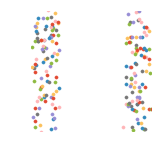

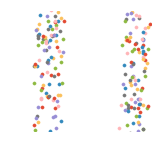

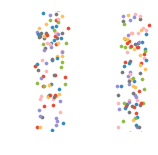

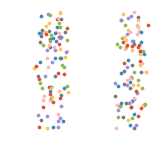

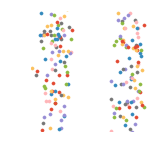

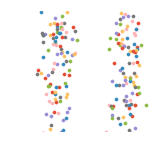

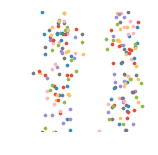

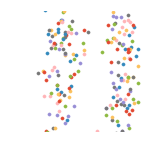

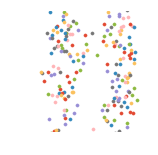

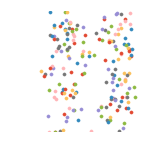

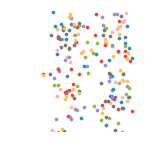

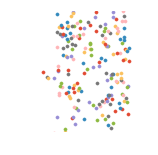

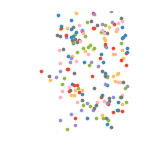

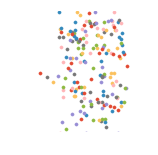

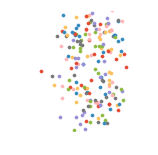

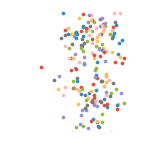

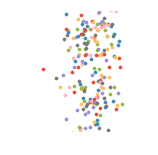

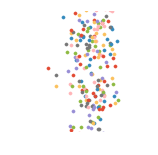

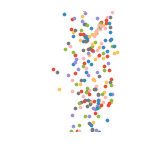

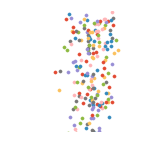

In [95]:
# plot synthetic data
outplot=osp.join(outdir,'raw')
if osp.exists(outplot) is False:
    os.mkdir(outplot)
    
groups=df.groupby('frame')
for i in range(tmax):
    group=groups.get_group(i).reset_index(drop=True)
    fig=figure(frameon=False)
    fig.set_size_inches(500/300.,500/300.)
    ax = fig.add_axes([0, 0, 1, 1])
    for k in range(group.shape[0]):
        ax.scatter(group.loc[k,'x'],group.loc[k,'y'],s=10)
    xlim(0,500)
    ylim(500,0)
    ax.axis('off')
    fig.savefig(osp.join(outplot,'%04d.png'%i),dpi=300)


In [96]:
%run analyze_traj.py
outdir='/home/amichaut/Desktop/synthetic_data'
cell_analysis(outdir,refresh=True)



 WELCOME TO TRACK_ANALYSIS 
 Developped and maintained by Arthur Michaut: arthur.michaut@gmail.com 
 Released on 03-29-2017


     _''_
    / o  \
  <       |
    \    /__
    /       \-----
    /    \    \   \__
    |     \_____\  __>
     \--       ___/  
        \     /
         || ||
         /\ /\


Usage: 
- plot cells analysis using cell_analysis(data_dir,refresh,parallelize,plot_traj,hide_labels,no_bkg,linewidth) 	 data_dir: data directory, refresh (default False) to refresh the table values, parallelize (default False) to run analyses in parallel, 
plot_traj (default true) to print the cell trajectories, hide_labels (default True) to hide the cell label, no_bkg (default False) to remove the image background, linewidth being the trajectories width (default=1.0) 

- plot maps using map_analysis(data_dir,refresh,parallelize,x_grid_size,no_bkg,z0,dimensions,axis_on) 	 data_dir: data directory, refresh (default False) to refresh the table values, parallelize (default False) to ru

computing velocity field 2.0  

<string>:387: RuntimeWarning: All-NaN axis encountered
<string>:392: RuntimeWarning: All-NaN slice encountered


computing mean velocity field 19.0                                                                                          

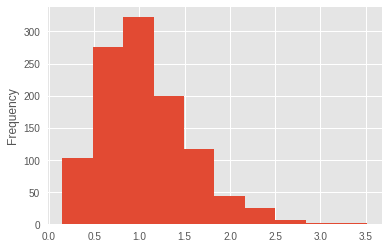

If you want to manually set the colorbar boundaries, enter the values (separated by a coma). Otherwise, press Enter: 
plotting mean velocity 19.0                   z0=-9.543484
plotting z flow 19.0ld 19.0                                      


In [98]:
map_analysis(outdir, refresh=True)

In [100]:
close('all')
avg_ROIs(outdir)

Give the map wou want to plot your ROIs on (div,mean_vel,z_flow,vfield): mean_vel
Give the frame number on which you want to draw your ROIs: 0
Draw your selections, press ENTER to validate one and close the window when you are finished
You have selected 1 ROIs
Is the selection correct? [y]/n: 
plotting ROI average 19.0                  


In [129]:
array(range(1,9))*9

array([ 9, 18, 27, 36, 45, 54, 63, 72])

[-1, 7, -1, 7]

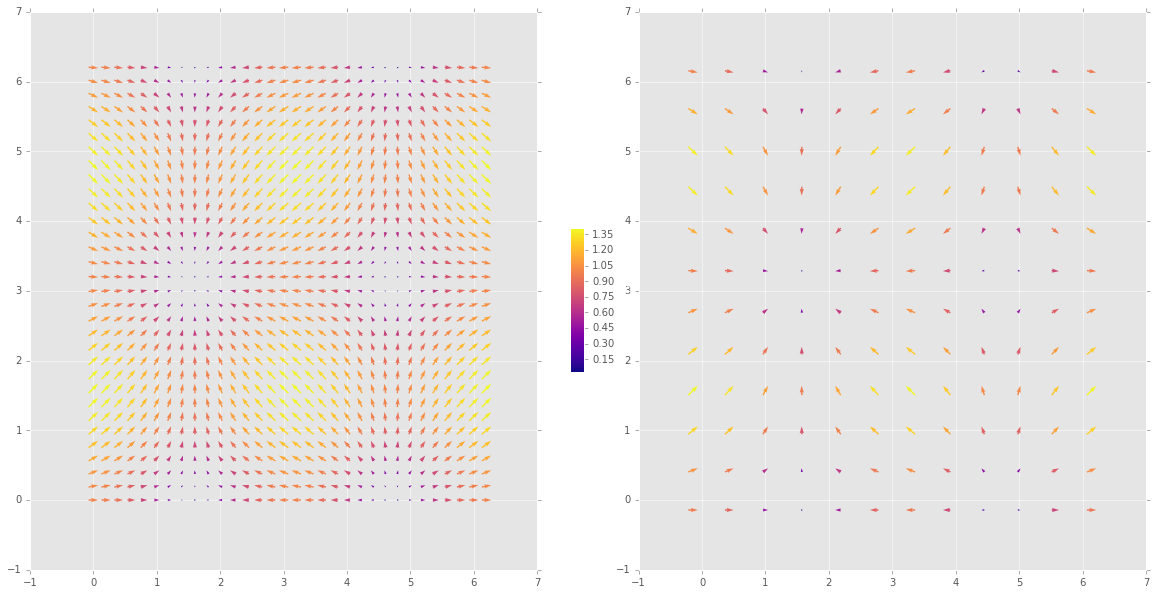

In [91]:
### TEST QUIVER

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(20, 10))
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M,
               units='x',
               pivot='mid',
               width=0.022,
               scale=1 / 0.15,
              cmap='plasma')

xmin, ymin, xmax, ymax=ax.axis()

cbaxes = fig.add_axes([0.5, 0.4, 0.01, 0.2]) 
cbar = fig.colorbar(Q,cax = cbaxes,label='$v_z\ (\mu m.min^{-1})$')
cbaxes.yaxis.label.set_color('white')
ax.axis([-1, 7, -1, 7])

### average grid

a=hstack([X.reshape(32*32,1),Y.reshape(32*32,1),U.reshape(32*32,1),V.reshape(32*32,1),M.reshape(32*32,1)])
df=pd.DataFrame(a,columns=['x','y','vx','vy','vz'])

#make subgrid
res=15
xmin, xmax, ymin, ymax = [-1, 7, -1, 7]
xsubgrid=linspace(xmin,xmax,res);ysubgrid=linspace(ymin,ymax,res)
X=[];Y=[];VX=[];VY=[];VZ=[] #new data
for i,xg in enumerate(xsubgrid[:-1]):
    for j,yg in enumerate(ysubgrid[:-1]):
        xg1=xsubgrid[i+1];yg1=ysubgrid[j+1]
        ind=((df['x']>=xg) & (df['x']<xg1) & (df['y']>=yg) & (df['y']<yg1))
        VX.append(df[ind]['vx'].mean());VY.append(df[ind]['vy'].mean());VZ.append(df[ind]['vz'].mean())
        X.append(xg+(xg1-xg)*0.5);Y.append(yg+(yg1-yg)*0.5) #center of the cell

Q = ax1.quiver(X,Y,VX,VY,VZ,
               units='x',
               pivot='mid',
               width=0.022,
               scale=1 / 0.15,
              cmap='plasma')

ax1.axis([-1, 7, -1, 7])

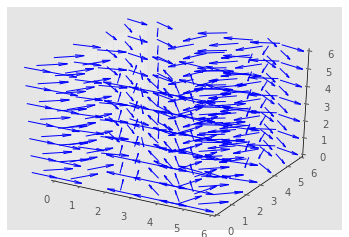

In [17]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

step=1

x, y, z = np.meshgrid(np.arange(0, 2 * np.pi, step),
                      np.arange(0, 2 * np.pi, step),
                      np.arange(0, 2 * np.pi, step))

u = np.cos(x)
v = np.sin(y)
w = np.ones(x.shape)*(0)

ax.quiver(x, y, z, u, v, w, length=1)

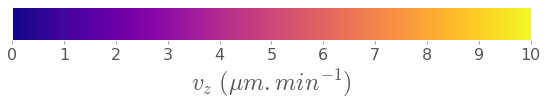

In [31]:
fig = figure(figsize=(8,3))
ax = fig.add_axes([0.05,0.80,0.9,0.15])
norm = plt.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm.plasma,norm=norm,orientation='horizontal')
ax.tick_params(labelsize=16)
cb1.set_label(label='$v_z\ (\mu m.min^{-1})$',size=24)

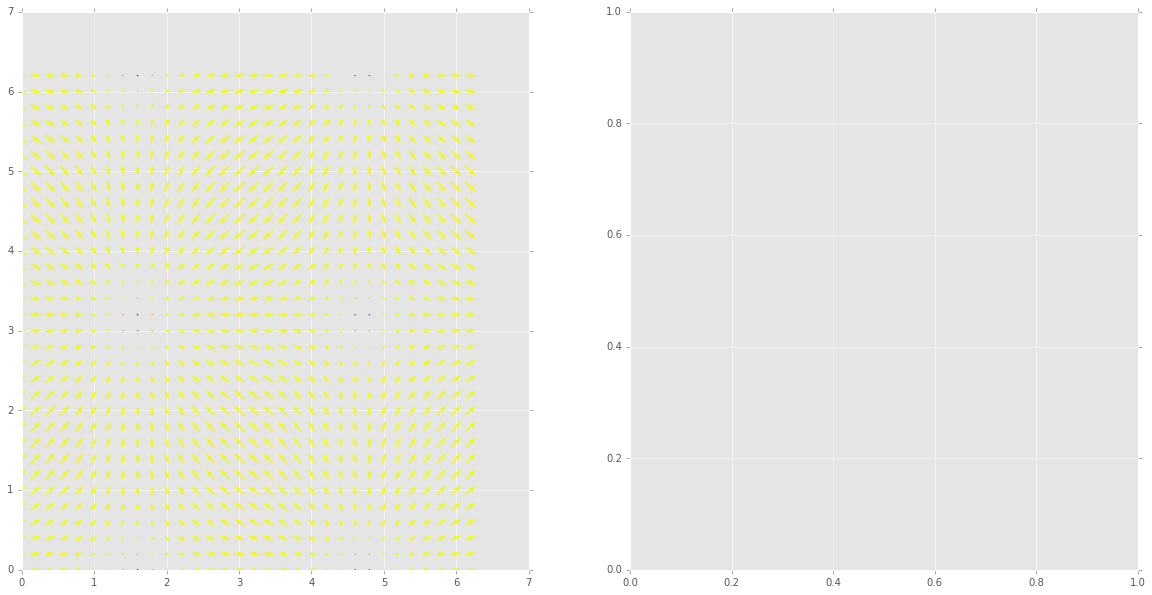

In [76]:
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(20, 10))
M = np.hypot(U, V)
Q = ax.quiver(X, Y, U, V, M,
               units='x',
               pivot='mid',
               width=0.022,
               scale=1 / 0.15,
              cmap='plasma',
             norm=plt.Normalize(0,0.3))

In [1]:
%matplotlib inline
%run analyze_traj.py



 WELCOME TO TRACK_ANALYSIS 
 Developped and maintained by Arthur Michaut: arthur.michaut@gmail.com 
 Released on 09-15-2016


     _''_
    / o  \
  <       |
    \    /__
    /       \-----
    /    \    \   \__
    |     \_____\  __>
     \--       ___/  
        \     /
         || ||
         /\ /\


Usage: 
- plot cells analysis using cell_analysis(data_dir,refresh,parallelize,plot_traj,hide_labels,no_bkg,dimensions) 
 	 data_dir: data directory, refresh (default False) to refresh the table values, parallelize (default False) to run analyses in parallel, 
plot_traj (default true) to print the cell trajectories, hide_labels (default True) to hide the cell label, no_bkg (default False) to remove the image background, dimensions ([row,column] default None) to give the image dimension in case of no_bkg 

- plot maps using map_analysis(data_dir,refresh,parallelize,x_grid_size,no_bkg,z0,dimensions) 
 	 data_dir: data directory, refresh (default False) to refresh the table values, para

/usr/local/lib/python2.7/dist-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


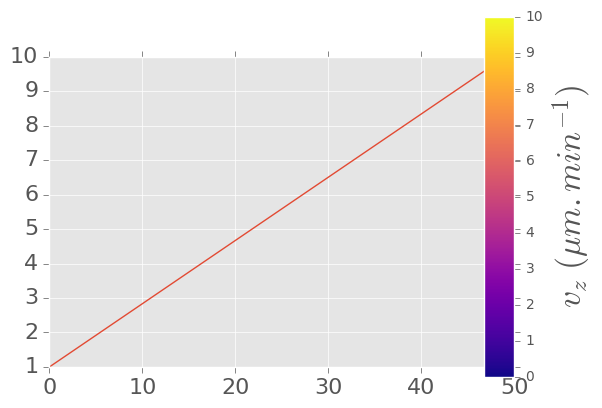

In [4]:
fig,ax=subplots(1,1)
ax.plot(linspace(1,10))
cax = fig.add_axes([0.85,0.10,0.05,0.9])
norm = plt.Normalize(vmin=0, vmax=10)
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cm.plasma,norm=norm,orientation='vertical')
ax.tick_params(labelsize=16)
cb1.set_label(label='$v_z\ (\mu m.min^{-1})$',size=24)

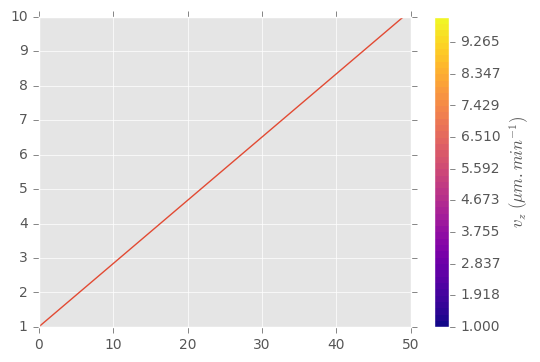

In [12]:
Z = [[0,0],[0,0]]
levels=linspace(1,10)
CS3 = plt.contourf(Z, levels, cmap=cm.plasma,label='$v_z\ (\mu m.min^{-1})$')
plt.clf()

fig,ax=subplots(1,1)
ax.plot(linspace(1,10))
cb1=fig.colorbar(CS3)
cb1.set_label(label='$v_z\ (\mu m.min^{-1})$')